In [2]:
#The goal of this project is to analyze Alex Carusos performance throughout the 2019-21 regular season and postseason
#all statistics and metrics used to evaluate alex caruso will be from the 2019-20 regular season and playoffs
#statistics are extracted from https://www.basketball-reference.com/players/c/carusal01.html#all_advanced



In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np 
%matplotlib inline

In [4]:
#df_playoffs is Alex Caruso's playoffs stats 2019-2020 season
#df_playoffs_advanced is Alex Caruso's advanced stats from the 2019-2020 season
#df_regseason is Alex Caruso's stats from the 2019-2020 regular season

df_playoffs = pd.read_csv('Caruso2019_playoffs.csv')
df_playoffs_advanced = pd.read_csv('Caruso_playoffs_advanced.csv')
df_regseason = pd.read_csv('caruso_201920_reg.csv')


In [5]:
#We need to do some typecasting because the minutes played column is not in a calculable form
#the minutes played is in a float type with ':' as a seperator of minutes and seconds
#I typecasted the minutes played column of all necessary columns used in ML models and calculations
#The minutes played column will display in the minutes and after the decimal will be the seconds divided by 60
import math 

def typecaster(val):
    #testing to see if the calculation is correct
    i = val
    #checking to see if there is a null value
    if (type(i) == float) and (math.isnan(i) == True): 
        r = 0
    #checking to see if the value is empty 
    elif len(str(i)) == 0: 
        r = 0
    else:     
        i = str(i)
        #getting rid of excess information 
        if len(i)>5:
            r = i[:-3]
        elif i == 'nan': 
            r = 0
        #we will split the value and convert it into decimal form
        new = i.split(':')
        if len(new) > 1:
            #we calculate the number of minutes in decimal form by taking the first element
            #and adding to the second element divided by 60
            r = int(new[0]) + int(new[1])/60
        else: 
            #if he played less than 1 minute we divide the result by 60
            r = float(new[0]) / 60
    return r

#apply our function to the column(use.map because it applies to the entire column rather than apply which applies to an entire row)
df_regseason['MP'] = df_regseason['MP'].map(typecaster)


In [6]:
#Applying the function to the df_playoffs column 
df_playoffs['MP'] = df_playoffs['MP'].map(typecaster)


The average number of minutes that Alex Caruso played during the regular season is 18.36 minutes


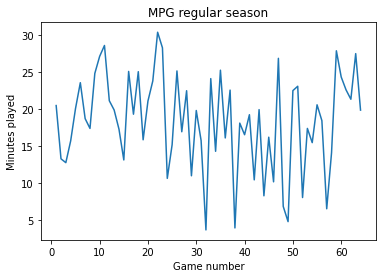

In [7]:
#here is a quick graph that shows the amount of minutes he played throughout each game in the regular season
x = df_regseason['G']
y = df_regseason['MP']

#Here is his average number of minutes played during the regular season
print('The average number of minutes that Alex Caruso played during the regular season is', round(df_regseason['MP'].mean(),2), 'minutes')
plt.plot(x,y)
plt.xlabel('Game number')
plt.ylabel('Minutes played')
plt.title('MPG regular season')
plt.show()

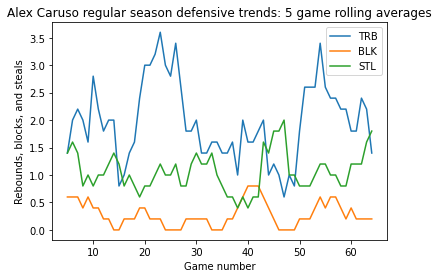

In [8]:
#regular season defensive trends
x = df_regseason[['G']]
y = df_regseason[['TRB', 'BLK', 'STL']]
leg_labels = ['TRB', 'BLK', 'STL']
plt.plot(x,y.rolling(window = 5).mean())
plt.title('Alex Caruso regular season defensive trends: 5 game rolling averages')
plt.xlabel('Game number')
plt.ylabel('Rebounds, blocks, and steals')
plt.legend(leg_labels)
plt.show()

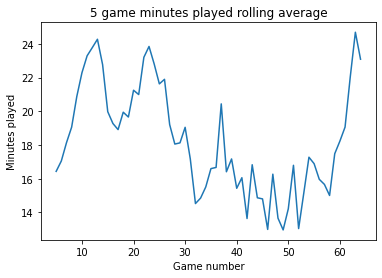

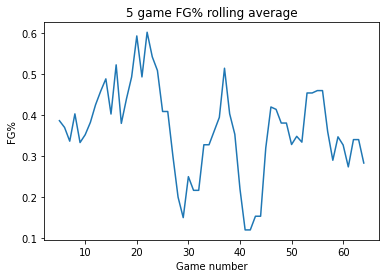

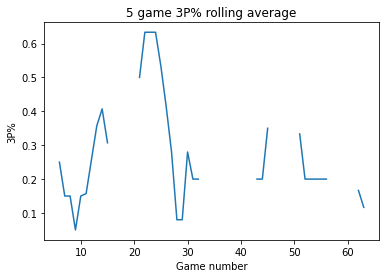

In [9]:
#regular season offensive trends
#we will use 5 game rolling averages to smooth out the data to find trends in performance increase and decrease
y_5rollavgmin = df_regseason['MP'].rolling(window = 5).mean()
y_5rollfg = df_regseason['FG%'].rolling(window = 5).mean()
y_5roll3p = df_regseason['3P%'].rolling(window = 5).mean()
y_5rollft = df_regseason['FT%'].rolling(window =5 ).mean()

plt.subplot()
plt.plot(x, y_5rollavgmin)
plt.title('5 game minutes played rolling average')
plt.xlabel('Game number')
plt.ylabel('Minutes played')
plt.show()

plt.title('5 game FG% rolling average')
plt.xlabel('Game number')
plt.ylabel('FG%')
plt.plot(x,y_5rollfg)
plt.show()

plt.subplot()
plt.plot(x, y_5roll3p)
plt.title('5 game 3P% rolling average')
plt.xlabel('Game number')
plt.ylabel('3P%')
plt.show()

#we see from these rolling averages that when Caruso had a higher number of minutes played(around game 20-25), 
#his FG% and 3P% increased when he played less minutes, his FG% and 3P% decreased accordingly
#the gaps in the 3p% graphs are because there are intervals greater than 5 games where he did not attempt a 3 point shot

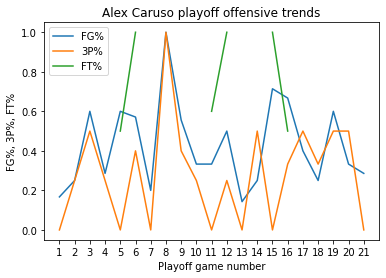

In [10]:
#playoffs offensive trends
x = df_playoffs['G']
y = df_playoffs[['FG%','3P%', 'FT%']]
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.title('Alex Caruso playoff offensive trends')
legend_labels = ['FG%', '3P%', 'FT%']
plt.xlabel('Playoff game number')
plt.ylabel('FG%, 3P%, FT%')
plt.legend(legend_labels)
plt.show()

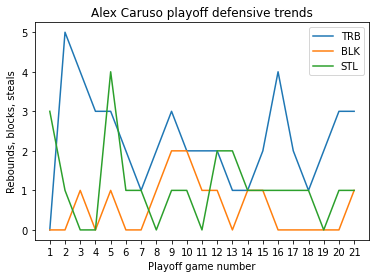

In [11]:
#playoffs defensive trends
x = df_playoffs['G']
y = df_playoffs[['TRB', 'BLK', 'STL']]
leg_labels = ['TRB', 'BLK', 'STL']
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.title('Alex Caruso playoff defensive trends')
plt.xlabel('Playoff game number')
plt.ylabel('Rebounds, blocks, steals')
plt.legend(leg_labels)
plt.show()

In [12]:
#an explaination of the game score metric can be found using this link: 
#https://www.nba.com/resources/static/team/v2/thunder/statlab-gamescore-191201.pdf
print('Alex Carusos average Game Score during the 2019-2020 regular season was' ,round(df_regseason['GmSc'].mean(),2))
#What is considered an "average" game score is 10 in the nba
print('Alex Carusos average number of minutes played during the 2019-2020 regular season was', round(df_regseason['MP'].mean(),2))

Alex Carusos average Game Score during the 2019-2020 regular season was 4.75
Alex Carusos average number of minutes played during the 2019-2020 regular season was 18.36


In [13]:
print('Alex Carusos average Game Score during the 2019-2020 playoffs was' ,round(df_playoffs_advanced['GmSc'].mean(), 4))
#What is considered an "average" game score is 10 in the nba and this is an improvement 
#from his performance during the regular season although he played more minutes
print('Alex Carusos average number of minutes played during the 2019-2020 playoffs was' ,round(df_playoffs['MP'].mean(), 4))

Alex Carusos average Game Score during the 2019-2020 playoffs was 5.4667
Alex Carusos average number of minutes played during the 2019-2020 playoffs was 24.2746


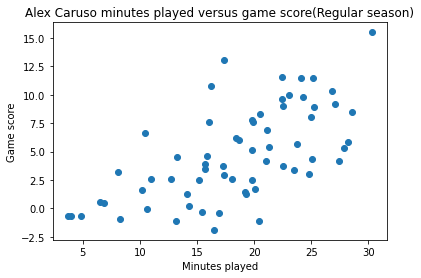

In [14]:
#scatter plot between game score and minutes played 
from sklearn.linear_model import LinearRegression

x = df_regseason['MP']
y = df_regseason['GmSc']
plt.scatter(x,y)
plt.title('Alex Caruso minutes played versus game score(Regular season)')
plt.xlabel('Minutes played')
plt.ylabel('Game score')
plt.show()
#from this graph we can see that there seems to be some positive linear correlation between his minutes played and his game score
#game score is a metric that takes into account many offensive and defensive statistics 

In [15]:
#What is the correlation between game score and minutes played
from scipy.stats import pearsonr
pcorr = pearsonr(x,y) 
print(pcorr)

#63% correlation between minutes played and game score!

(0.6334736343212575, 1.9337190436036948e-08)


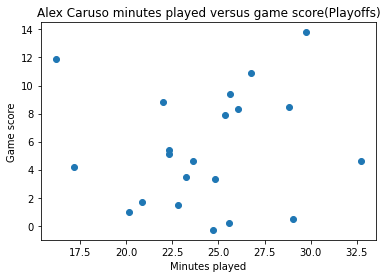

In [16]:
#minutes played vs game score in the playoffs
x = df_playoffs['MP']
y = df_playoffs['GmSc']
plt.scatter(x,y)
plt.title('Alex Caruso minutes played versus game score(Playoffs)')
plt.xlabel('Minutes played')
plt.ylabel('Game score')
plt.show()
#this scatter plot shows less of a positive linear correlation between game score and minutes played but it is a 
#far smaller data sample(playoffs)

In [17]:
df_regseason['GmSc'] = df_regseason['GmSc'].fillna(value = 0)
#there are a few null values where alex caruso did not play so we will fill those null values with a 0 


In [18]:
#splitting train and test data and building the linear regression model 
from sklearn.model_selection import train_test_split
#we will try to linearly predict Alex Caruso's game score based on the amount of minutes he played
x = df_regseason['MP'].values.reshape(-1,1)
y = df_regseason['GmSc'].values.reshape(-1,1)
#the training set will be 80% of the data
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,test_size = 0.2, random_state = 1)

lr = LinearRegression().fit(x_train, y_train)
pred = lr.predict(x_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred)
print('The mean absolute error of the linear regression model is',round(mae, 3), '(Game Score units)')

The mean absolute error of the linear regression model is 4.268 (Game Score units)


In [21]:
print(y.size)

64


In [19]:
print(x_test.size)
print(y_test.size)

13
13


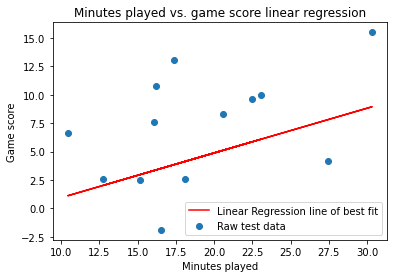

The models r^2 score is 0.38


In [18]:
## Here I plot the graph of the predicted values versus the test data along with the regression line shown below
#note that this model is using Caruso's data from the regular season since it is a larger sample size
plt.plot(x_test, pred, label = 'Linear Regression line of best fit', color = 'r')
plt.scatter(x_test, y_test, label = 'Raw test data')
plt.legend()
plt.title('Minutes played vs. game score linear regression')
plt.xlabel('Minutes played')
plt.ylabel('Game score')
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)
score = lr.score(x,y)
print('The models r^2 score is', round(score, 2))

In [19]:
from sklearn.linear_model import Lasso

#here I try a lasso regression model to see if it is more accurate than the linear regression(it is not)
lasso_regressor = Lasso()
lasso_regressor.fit(x_train,y_train)
lasso_pred = lasso_regressor.predict(x_test)
lasso_r2 = r2_score(y_test, lasso_pred)
print('The Lasso regressor r^2 score is: ',lasso_r2)


The Lasso regressor r^2 score is:  -0.10608750078464313


In [20]:
from sklearn.ensemble import RandomForestRegressor
#here I try a random forest regression and see that it is far less accurate than the linear regression model

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_r2 = r2_score(y_test, rf_pred)
print('The random forest regressor r^2 score is: ',rf_r2)

The random forest regressor r^2 score is:  -0.38045815857542875


/Users/lucrieffel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [21]:
df_playoffs_ws = pd.read_csv('2019-20playoffsadvanced.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)

df_playoffs_ws.drop(df_playoffs_ws.columns[df_playoffs_ws.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

print(df_playoffs_ws.head())
#here I printed a short table that shows advanced statistics such as win shares(offensive and defensive), PER, and rebound percentages
#The only statistic that stands out to me is his steal percentage and difference between TOV% and USG rate

   Rk                    Player  Age   G   MP   PER    TS%   3PAr    FTr  \
0   1             Anthony Davis   26  21  769  29.6  0.665  0.167  0.499   
1   2              LeBron James   35  21  762  30.2  0.647  0.312  0.393   
2   3  Kentavious Caldwell-Pope   26  21  608  10.5  0.560  0.630  0.143   
3   4               Danny Green   32  21  525   9.6  0.473  0.676  0.088   
4   5               Alex Caruso   25  21  510   9.9  0.543  0.540  0.265   

   ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  \
0   8.5  22.7  15.6  16.1   1.7   3.8  10.8  27.8  3.3  1.2  4.5  0.284   6.5   
1   4.4  30.5  17.5  42.0   1.7   2.3  15.8  30.4  3.0  1.2  4.3  0.269   7.6   
2   1.6   6.9   4.3   6.4   1.7   0.6   6.9  15.5  0.5  0.6  1.1  0.089  -0.9   
3   5.7   9.2   7.4   6.7   1.9   3.0   6.4  15.6  0.1  0.7  0.8  0.070  -1.2   
4   3.5   7.6   5.6  15.2   2.2   2.3  19.7  13.4  0.2  0.6  0.8  0.080  -2.4   

   DBPM   BPM  VORP  
0   2.1   8.7   2.1  
1   3.0  10.

In [22]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df_playoffs_ws.head(5))

#from this table we can see that Alex Caruso ranks 5th in defensive win shares and 4th in offensive win shares when comapred to his teamates
#it should also be taken into account that his turnover percentage is significantly higher than his usage rate which would show a offensive weakness/inefficiency
#His PER is below the league average of 15(his playoff PER was 9.9 and regular season was 10.8)
#here are alex caruso's hustle stats: https://go.nba.com/i91v
#During the playoffs alex caruso averaged 2.3 deflections per game!!!(click on the link above to see this table I was not able to extract the data)



   Rk                    Player  Age   G   MP   PER    TS%   3PAr    FTr  \
0   1             Anthony Davis   26  21  769  29.6  0.665  0.167  0.499   
1   2              LeBron James   35  21  762  30.2  0.647  0.312  0.393   
2   3  Kentavious Caldwell-Pope   26  21  608  10.5  0.560  0.630  0.143   
3   4               Danny Green   32  21  525   9.6  0.473  0.676  0.088   
4   5               Alex Caruso   25  21  510   9.9  0.543  0.540  0.265   

   ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  \
0   8.5  22.7  15.6  16.1   1.7   3.8  10.8  27.8  3.3  1.2  4.5  0.284   6.5   
1   4.4  30.5  17.5  42.0   1.7   2.3  15.8  30.4  3.0  1.2  4.3  0.269   7.6   
2   1.6   6.9   4.3   6.4   1.7   0.6   6.9  15.5  0.5  0.6  1.1  0.089  -0.9   
3   5.7   9.2   7.4   6.7   1.9   3.0   6.4  15.6  0.1  0.7  0.8  0.070  -1.2   
4   3.5   7.6   5.6  15.2   2.2   2.3  19.7  13.4  0.2  0.6  0.8  0.080  -2.4   

   DBPM   BPM  VORP  
0   2.1   8.7   2.1  
1   3.0  10.

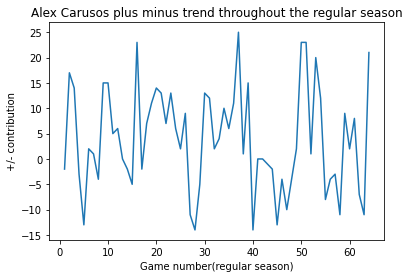

In [23]:
#In addition to our analysis of his game score versus his minutes played we can analyze his plus minus statistics
#there is no clear trend in his performance throughout the season, overall i
plt.plot(df_regseason['G'], df_regseason['+/-'] )
plt.title('Alex Carusos plus minus trend throughout the regular season')
plt.xlabel('Game number(regular season)')
plt.ylabel('+/- contribution')
plt.show()

In [24]:
print(df_regseason.head())

   Rk  G      Date     Age   Tm Unnamed: 5  Opp        W  GS         MP  FG  \
0   2  1  10/25/19  25-239  LAL        NaN  UTA   W (+9)   0  20.450000   1   
1   3  2  10/27/19  25-241  LAL        NaN  CHO  W (+19)   0  13.266667   2   
2   4  3  10/29/19  25-243  LAL        NaN  MEM  W (+29)   0  12.750000   0   
3   5  4   11/1/19  25-246  LAL          @  DAL   W (+9)   0  15.683333   3   
4   6  5   11/3/19  25-248  LAL          @  SAS   W (+7)   0  20.033333   1   

   FGA    FG%  3P  3PA  3P%  FT  FTA  FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  \
0    3  0.333   0    0  NaN   0    0  NaN    0    0    0    0    1    0    2   
1    3  0.667   1    2  0.5   0    0  NaN    0    2    2    1    1    1    1   
2    4  0.000   0    2  0.0   0    0  NaN    0    3    3    4    3    1    2   
3    5  0.600   1    2  0.5   0    0  NaN    0    2    2    0    0    0    1   
4    3  0.333   0    1  0.0   0    0  NaN    0    0    0    3    2    1    3   

   PF  PTS  GmSc  +/-  
0   1    2  -1.1   -

In [25]:
#Alex Caruso's +/- for the regular season shows he positively contributed 247 points
#This is a great number and shows his presence on the court had a net positive impact throught the season

print('Alex Carusos net +/- was positive',df_regseason['+/-'].sum(), 'points')


Alex Carusos net +/- was positive 247 points


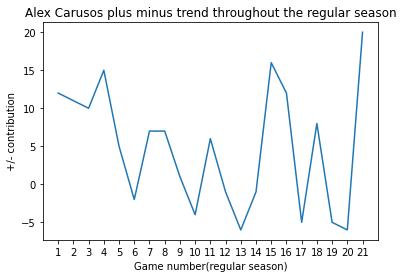

In [26]:
#Here is a look at his +/- throughout the postseason
x = df_playoffs['G']
y = df_playoffs['+/-'] 
plt.plot(x, y)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.title('Alex Carusos plus minus trend throughout the regular season')
plt.xlabel('Game number(regular season)')
plt.ylabel('+/- contribution')
plt.show()

In [27]:
#Our analysis of his +/- in the playoffs shows

#Again we drop the games in which he did not play from our calculations
df_playoffs['+/-'].dropna(inplace = True)
df_playoffs['G'].dropna(inplace = True)

print('Alex Carusos net +/- in the postseason is',sum(df_playoffs['+/-']), 'points')

Alex Carusos net +/- in the postseason is 100 points


In [28]:
from sklearn.linear_model import LogisticRegression

#convert MP to int
x = df_regseason['MP']

def mincaster(v):
    v = int(v)
    return v

x = x.map(mincaster)


#I need to typecast wins into 1 and 0 variables to fit the model
def caster(v): 
    if v[0] == 'L': 
        r = 0
    else: 
        r = 1
    return r

df_regseason['Wcast'] = df_regseason['W'].map(caster)

y = df_regseason['Wcast']

lg = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,test_size = 0.2, random_state = 1)

model = lg.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
lg_pred = lg.predict(x_test.values.reshape(-1,1))
score = model.score(x_test.values.reshape(-1,1), y_test.values.reshape(-1,1))

/Users/lucrieffel/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The mean absoulte error of the model is  0.3076923076923077
The score of the logistic regression model is  0.6923076923076923
The coefficient of the logistic regression model is  0.011707889272885488


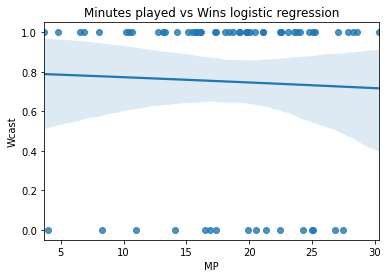

In [29]:
import seaborn as sns

sns.regplot(x= df_regseason.MP, y= df_regseason.Wcast, data=df_regseason, logistic=True).set(title = "Minutes played vs Wins logistic regression")
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test.values.reshape(-1,1), lg_pred)
print('The mean absoulte error of the model is ',mae)
print('The score of the logistic regression model is ', score)
print('The coefficient of the logistic regression model is ',float(model.coef_))


In [30]:
#correlation between minutes played and Team wins
from scipy.stats import pearsonr
pcorr = pearsonr(x,y) 
print(pcorr)
#correlation: -0.03465: Not a signiciant correlation because the p value is 0.7857!

(-0.03465420389218772, 0.7857364185215274)
